The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[array([-5, -5]), array([-5.2, -1. ]), array([-3.87893737,  1.78689925]), array([-3.44501007,  0.05197702]), array([-2.10707595, -0.28680126]), array([-1.63583354, -0.10460009]), array([-1.14950405,  0.11910318]), array([-1.03924182,  0.06980179]), array([-0.80686612,  0.13976044]), array([-0.7916008 ,  0.09602475]), array([-0.66269253,  0.1393648 ]), array([-0.67794791,  0.10520196]), array([-0.59728017,  0.13589552]), array([-0.62102341,  0.10964133]), array([-0.56602267,  0.13290732]), array([-0.59045869,  0.1126238 ]), array([-0.55075417,  0.13088747]), array([-0.5731704 ,  0.11505982]), array([-0.54341599,  0.12965986]), array([-0.56301432,  0.1171884 ]), array([-0.54015721,  0.12897418]), array([-0.55688329,  0.11906646]), array([-0.53902706,  0.12863246]), array([-0.55310919,  0.12071003]), array([-0.53899543,  0.12849897]), array([-0.55075369,  0.12213182]), array([-0.53950433,  0.12848596])

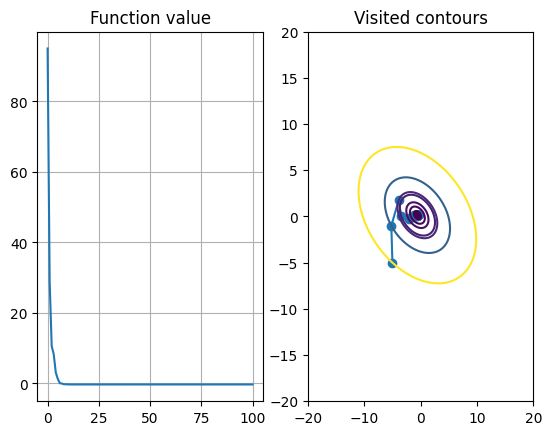

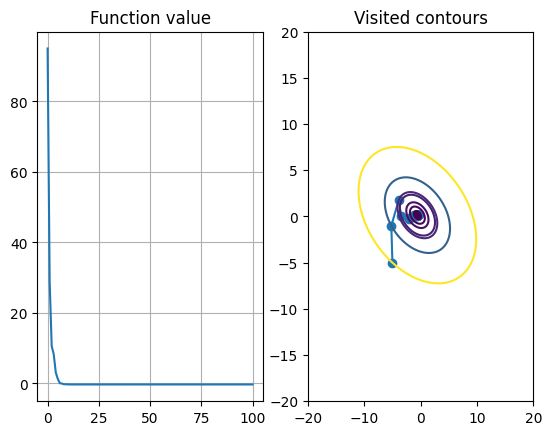

In [107]:
%load_ext autoreload
%autoreload 2

from core.gradient_descent import *
from core.visualizer import *

roi=SearchRegion2d((-20, 20), (-20, 20))

def get_func(a, b, c, d, e):
    def func(xs):
        x, y = xs
        return a * x**2 + b * y**2 + c * x*y + d * x + e * y
    return func

def get_derivative(a, b, c, d, e):
    def func(xs):
        x, y = xs
        return np.array([2 * a * x + c * y + d, 2 * b * y + c * x + e])
    return func

f1 = get_func(1, 0, 1, 0, 0)
g1 = get_derivative(1, 0, 1, 0, 0)
f2 = get_func(0, 2, 0, 1, 0)
g2 = get_derivative(0, 2, 0, 1, 0)

def sum_funcs(f, g):
    return lambda x: f(x) + g(x)

#points = steepest_descent(sum_funcs(f1, f2), sum_funcs(g1, g2), np.array([-5, -5]), bin_search, lambda f, steps: len(steps) > 50)
#points = gradient_descent_minibatch([f1, f2], [g1, g2], 1, np.array([-5, -5]), exponential_learning_scheduler(0.3, 0.2), lambda f, steps: len(steps) > 100)
#points = steepest_descent_with_momentum(0.5)(sum_funcs(f1, f2), sum_funcs(g1, g2), np.array([-5, -5]), bin_search, lambda f, steps: len(steps) > 50)
points = gradient_descent_minibatch_with_momentum(0.5, True)([f1, f2], [g1, g2], 1, np.array([-5, -5]), exponential_learning_scheduler(0.4, 0.1), lambda f, steps: len(steps) > 100)
print(points)
visualize_optimizing_process(sum_funcs(f1, f2), roi, np.array(points))

